In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def conjugate_gradient(A, b, x0, epsilon):
    def grad_f(x):
        return A @ x - b

    x = x0
    g = grad_f(x)
    p_prev = None
    Ap_prev = None

    iterations = 0
    while np.linalg.norm(grad_f(x)) > epsilon: 
        g = grad_f(x)
        beta_prev = np.dot(Ap_prev, g) / np.dot(Ap_prev, p_prev) if iterations > 0 else 0
        p = -g + beta_prev * p_prev if iterations > 0 else -g
        Ap = A @ p
        alpha = - np.dot(g, p) / np.dot(Ap, p) if np.linalg.norm(p) != 0 else 0
        x_new = x + alpha * p
        p_prev, Ap_prev = p, Ap
        x = x_new
        iterations += 1
        # print(f'it = {iterations}, x = {x}')
    return x, iterations

In [112]:
A = 2 * np.array([[1, 0.25], [0.25, 2.5]])
b = 2 * np.array([-3.5, -6.5])
epsilon = 1e-6

def F(x):
    return 0.5 * ((A @ x) @ x) - (b @ x)

x0 = np.array([0, 0])
x_min, iterations = conjugate_gradient(A, b, x0, epsilon)

print("Точка минимума:", x_min)
print("Значение функции:", F(x_min))
print("Количество итераций:", iterations)

Точка минимума: [-2.92307692 -2.30769231]
Значение функции: -25.23076923076923
Количество итераций: 2


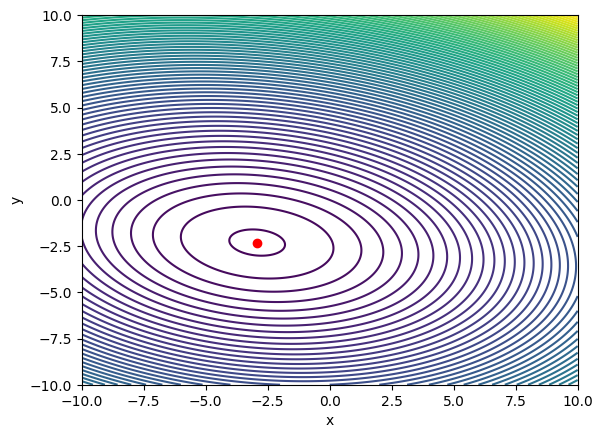

In [113]:
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (A[0, 0] * X ** 2 + 2 * A[0, 1] * X * Y + A[1, 1] * Y ** 2) - b[0] * X - b[1] * Y

plt.contour(X, Y, Z, levels=100)
plt.scatter(x_min[0], x_min[1], c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Text(0, 0.5, 'y')

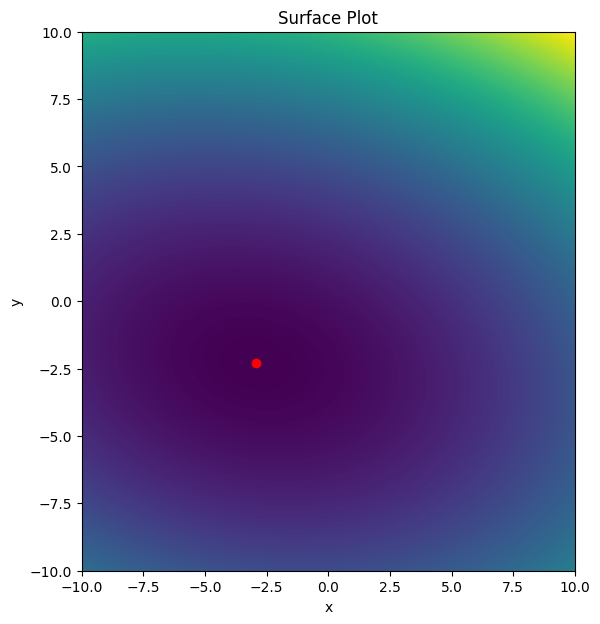

In [114]:
fig = plt.figure(figsize=(14, 7))
ax3 = fig.add_subplot(122)
ax3.imshow(Z, extent=[-10, 10, -10, 10], origin='lower', aspect='auto')
ax3.set_title('Surface Plot')
ax3.scatter(x_min[0], x_min[1], c='r')
ax3.set_xlabel('x')
ax3.set_ylabel('y')